In [873]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score

In [874]:
test = pd.read_csv("test.csv",sep=',')
train = pd.read_csv("train.csv",sep=',')
sample_submission = pd.read_csv("sample_submission.csv",sep=',')

Information about the dataset

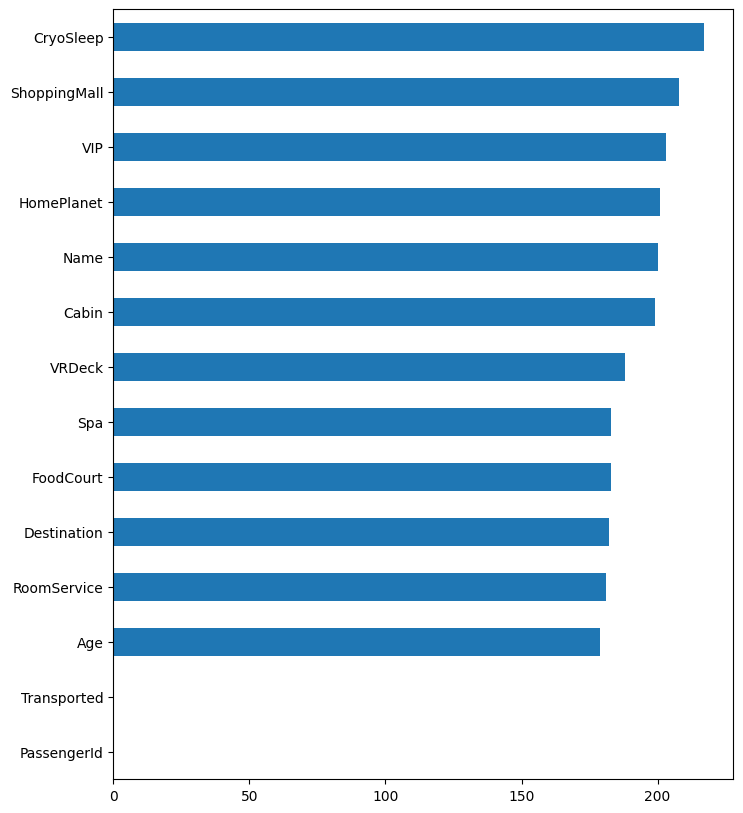

In [875]:
x=train.isna().sum()
x=x.sort_values(ascending=True)

xtoplot = x.plot(kind='barh', figsize=(8, 10))

In [876]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

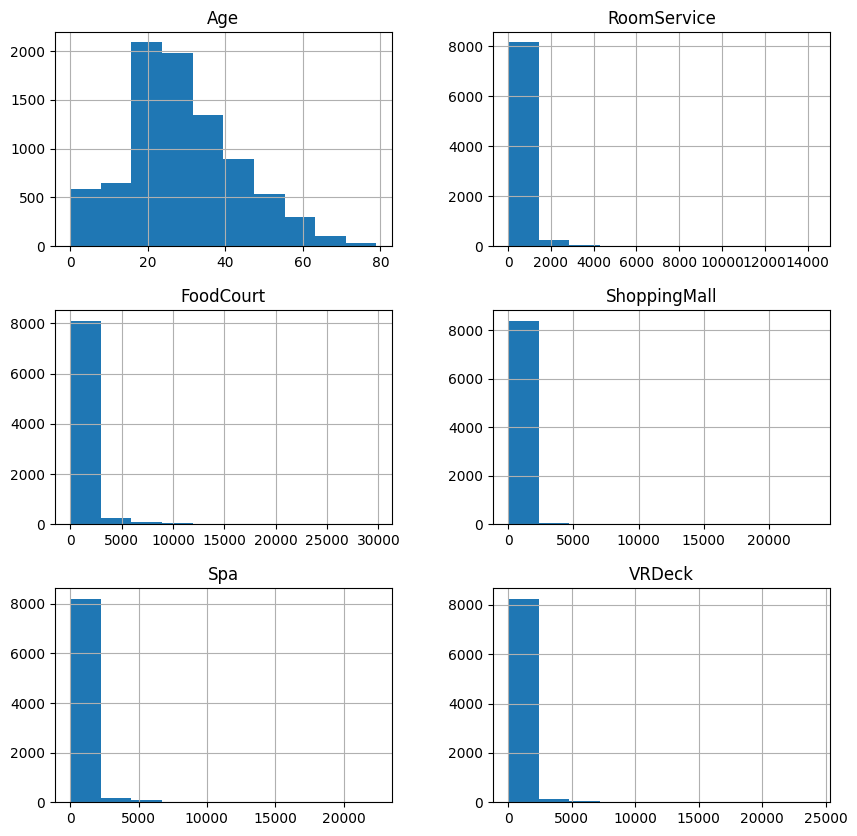

In [877]:
train.hist(figsize=(10,10))

In [878]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [879]:
corr = train.corrwith(train["Transported"], numeric_only = True)
corr.sort_values(ascending = True)

RoomService    -0.244611
Spa            -0.221131
VRDeck         -0.207075
Age            -0.075026
ShoppingMall    0.010141
FoodCourt       0.046566
Transported     1.000000
dtype: float64

In [880]:
train=train.dropna()

In [881]:
train[['DeckName','DeckNumber','DeckSide']]=train['Cabin'].str.split('/',expand=True)
train[['Group','ID']]=train['PassengerId'].str.split('_',expand=True)

In [882]:
train["DeckName"],class_name = pd.factorize(train["DeckName"])
train["DeckSide"],class_name = pd.factorize(train["DeckSide"])
train["DeckNumber"],class_name = pd.factorize(train["DeckNumber"])
train["Group"],class_name = pd.factorize(train["Group"])
train["ID"],class_name = pd.factorize(train["ID"])



In [883]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,DeckName,DeckNumber,DeckSide,Group,ID
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,1,1,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,0,1,2,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,0,1,2,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,2,85,0,5011,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,3,1732,1,5012,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,3,1451,1,5013,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4,1733,1,5014,0


In [884]:
Y_train = train['Transported']

X_train = train.drop(['PassengerId', 'Name', 'Transported','Cabin'], axis=1)




In [885]:
X_train = pd.get_dummies(X_train, columns=['HomePlanet', 'Destination'], drop_first=True)

In [886]:
merged_test = pd.merge(sample_submission, test, on='PassengerId')

merged_test=merged_test.dropna()



In [887]:
Y_test = merged_test['Transported']

X_test = merged_test.drop(['PassengerId', 'Name','Cabin','Transported'], axis=1)






In [888]:
X_test.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [889]:
X_test[['DeckName','DeckNumber','DeckSide']]=merged_test['Cabin'].str.split('/',expand=True)
X_test[['Group','ID']]=merged_test['PassengerId'].str.split('_',expand=True)

X_test["DeckName"],class_name = pd.factorize(X_test["DeckName"])
X_test["DeckSide"],class_name = pd.factorize(X_test["DeckSide"])
X_test["DeckNumber"],class_name = pd.factorize(X_test["DeckNumber"])
X_test["Group"],class_name = pd.factorize(X_test["Group"])
X_test["ID"],class_name = pd.factorize(X_test["ID"])

X_test = pd.get_dummies(X_test, columns=['HomePlanet', 'Destination'], drop_first=True)

In [890]:
X_pred=X_test

In [891]:
X_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,DeckName,DeckNumber,DeckSide,Group,ID,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,True,False,False,True
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0,1,1,0,False,False,False,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,2,0,1,2,0,True,False,False,True
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,2,0,1,2,1,True,False,False,True
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1,1,3,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,2,85,0,5011,0,True,False,False,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,3,1732,1,5012,0,False,False,True,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,3,1451,1,5013,0,False,False,False,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,4,1733,1,5014,0,True,False,False,False


In [892]:
X_test.shape

(3281, 17)

In [893]:
Y_test.shape

(3281,)

In [894]:
X_train.shape

(6606, 17)

In [895]:
Y_train.shape

(6606,)

In [896]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.2, random_state=42)

Random Forest

In [897]:
model_RandomForest = RandomForestClassifier(n_estimators=100, 
                                  max_depth=8
                                  )

model_RandomForest.fit(X_train, Y_train)
predictions_randomforest = model_RandomForest.predict(X_test)

Score_RandomForest = accuracy_score(Y_test, predictions_randomforest)
print(Score_RandomForest)

0.8116490166414524


In [898]:
X_test.replace({True: 1, False: 0}, inplace=True)
X_train.replace({True: 1, False: 0}, inplace=True)
Y_test.replace({True: 1, False: 0}, inplace=True)
Y_train.replace({True: 1, False: 0}, inplace=True)


model_XGBoost = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss",enable_categorical=True)


model_XGBoost.fit(X_train, Y_train)
predictions_xgboost = model_XGBoost.predict(X_test)
Score_xgboost = accuracy_score(Y_test, predictions_xgboost)
print(Score_xgboost)

0.8154311649016641


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

In [899]:
X_pred.replace({True: 1, False: 0}, inplace=True)
y_pred=model_XGBoost.predict(X_pred)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

In [900]:
submission = np.where(y_pred==1,True, False)
submission_style = pd.read_csv('/Users/gwen/Desktop/Machine learning/Space_Titanic/sample_submission.csv')
submission_style['Transported'] = submission
submission_style.to_csv('submission.csv',index=False)
submission_style.head()

ValueError: Length of values (3281) does not match length of index (4277)